In [60]:
import pandas as pd
import tweepy
from wordcloud import WordCloud

In [61]:
#Twitter API credentials
consumer_key = "1E8eY4bIE5VgTo3DWUgBQLoXf"
consumer_secret = "0Io9rJNDk6OuIdbuX5BTB4fiDgRCWkJH3YP15iQivvBuJUco4N"
access_key = "1301090680152883200-Cvzk4sBprcEkEnh0NuRX5DIHKoxf2f"
access_secret = "W0IYFVa6JlRix9ZAESEZUD2MNrJCcKfLHCchACgFPAoZF"


In [62]:
alltweets = []

In [63]:

def get_all_tweets(screen_name):
    auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    new_tweets = api.user_timeline(screen_name = screen_name, count=200)
    alltweets.extend(new_tweets)
    
    oldest = alltweets[-1].id - 1
    while len(new_tweets)>0:
        new_tweets = api.user_timeline(screen_name = screen_name, count=200,max_id=oldest)
        #save most recent tweets
        alltweets.extend(new_tweets)
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        print ("...%s tweets downloaded so far" % (len(alltweets)))     
 
    outtweets = [[tweet.created_at,tweet.entities["hashtags"],tweet.entities["user_mentions"],tweet.favorite_count,
                  tweet.geo,tweet.id_str,tweet.lang,tweet.place,tweet.retweet_count,tweet.retweeted,tweet.source,tweet.text,
                  tweet._json["user"]["location"],tweet._json["user"]["name"],tweet._json["user"]["time_zone"],
                  tweet._json["user"]["utc_offset"]] for tweet in alltweets]
    

    tweets_df = pd.DataFrame(columns = ["time","hashtags","user_mentions","favorite_count",
                                    "geo","id_str","lang","place","retweet_count","retweeted","source",
                                    "text","location","name","time_zone","utc_offset"])
    tweets_df["time"]  = pd.Series([str(i[0]) for i in outtweets])
    tweets_df["hashtags"] = pd.Series([str(i[1]) for i in outtweets])
    tweets_df["user_mentions"] = pd.Series([str(i[2]) for i in outtweets])
    tweets_df["favorite_count"] = pd.Series([str(i[3]) for i in outtweets])
    tweets_df["geo"] = pd.Series([str(i[4]) for i in outtweets])
    tweets_df["id_str"] = pd.Series([str(i[5]) for i in outtweets])
    tweets_df["lang"] = pd.Series([str(i[6]) for i in outtweets])
    tweets_df["place"] = pd.Series([str(i[7]) for i in outtweets])
    tweets_df["retweet_count"] = pd.Series([str(i[8]) for i in outtweets])
    tweets_df["retweeted"] = pd.Series([str(i[9]) for i in outtweets])
    tweets_df["source"] = pd.Series([str(i[10]) for i in outtweets])
    tweets_df["text"] = pd.Series([str(i[11]) for i in outtweets])
    tweets_df["location"] = pd.Series([str(i[12]) for i in outtweets])
    tweets_df["name"] = pd.Series([str(i[13]) for i in outtweets])
    tweets_df["time_zone"] = pd.Series([str(i[14]) for i in outtweets])
    tweets_df["utc_offset"] = pd.Series([str(i[15]) for i in outtweets])
    tweets_df.to_csv(screen_name+"_tweets.csv")
    return tweets_df

In [64]:
tweet = get_all_tweets("imVkohli")

...400 tweets downloaded so far
...600 tweets downloaded so far
...800 tweets downloaded so far
...1000 tweets downloaded so far
...1200 tweets downloaded so far
...1400 tweets downloaded so far
...1600 tweets downloaded so far
...1800 tweets downloaded so far
...2000 tweets downloaded so far
...2198 tweets downloaded so far
...2210 tweets downloaded so far
...2210 tweets downloaded so far


In [65]:
tweet.head()

,time,hashtags,user_mentions,favorite_count,geo,id_str,lang,place,retweet_count,retweeted,source,text,location,name,time_zone,utc_offset
0,2020-09-03 14:15:58,[],[],93771,None,1301524339947307009,en,None,6895,False,Twitter for Android,Nothing like a proper cricketing shot⚡ https:/...,,Virat Kohli,None,None
1,2020-09-03 07:04:19,[],"[{'screen_name': 'RCBTweets', 'name': 'Royal C...",81430,None,1301415710648721409,en,None,4804,False,Twitter for Android,Proper session + proper humidity + great recov...,,Virat Kohli,None,None
2,2020-09-03 06:20:39,[],[],23564,None,1301404722654404608,en,None,2013,False,Twitter for Android,"We may be challengers on-the-field, but who ar...",,Virat Kohli,None,None
3,2020-09-03 05:48:24,[],"[{'screen_name': 'MdShami11', 'name': 'Mohamma...",148576,None,1301396607963787264,en,None,7469,False,Twitter for Android,Happy b'day Shami @MdShami11. Mehnat aur bowli...,,Virat Kohli,None,None
4,2020-09-02 06:13:13,[],"[{'screen_name': 'ImIshant', 'name': 'Ishant S...",124920,None,1301040464297033729,en,None,5706,False,Twitter for Android,Wishing you a very Happy Birthday @ImIshant . ...,,Virat Kohli,None,None


In [66]:
tweet1=tweet.text

In [67]:
tweet_string = " ".join(tweet1)

In [68]:
# Removing unwanted symbols incase if exists
tweet_string = re.sub("[^A-Za-z" "]+"," ",tweet_string).lower()
tweet_string = re.sub("[0-9" "]+"," ",tweet_string)

In [69]:
tweet_words = tweet_string.split(" ")
print(tweet_words)

['nothing', 'like', 'a', 'proper', 'cricketing', 'shot', 'https', 't', 'co', 'whj', 'eibwsz', 'proper', 'session', 'proper', 'humidity', 'great', 'recovery', 'rcbtweets', 'https', 't', 'co', 'goi', 'igflxm', 'we', 'may', 'be', 'challengers', 'on', 'the', 'field', 'but', 'who', 'are', 'the', 'real', 'challengers', 'off', 'the', 'field', 'stay', 'tuned', 'to', 'know', 'more', 'https', 't', 'co', 'rmjhwwitp', 'happy', 'b', 'day', 'shami', 'mdshami', 'mehnat', 'aur', 'bowling', 'dono', 'karte', 'raho', 'daba', 'ke', 'wishing', 'you', 'a', 'very', 'happy', 'birthday', 'imishant', 'have', 'a', 'wonderful', 'and', 'successful', 'year', 'ahead', 'enjoy', 'the', 'day', 'https', 't', 'co', 'qyqbznszb', 'another', 'top', 'session', 'last', 'night', 'rcbtweets', 'https', 't', 'co', 'bncbs', 'ihwo', 'the', 'nation', 'has', 'lost', 'a', 'brilliant', 'leader', 'saddened', 'to', 'hear', 'about', 'the', 'passing', 'of', 'shri', 'pranab', 'mukherjee', 'my', 'sincere', 'con', 'https', 't', 'co', 'x', 'qz

In [70]:
with open("C:/Users/manth/Assignment/Text Mining/stop.txt","r") as sw:
    stopwords = sw.read()

stopwords = stopwords.split("\n")

tweet_words = [w for w in tweet_words if not w in stopwords]

In [71]:
# Joinining all the reviews into single paragraph 
tweet_para = " ".join(tweet_words)

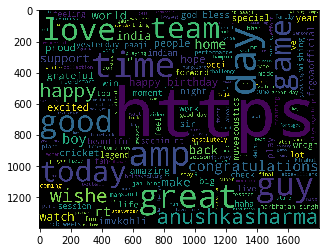

In [72]:
wordcloud_ip = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(tweet_para)

plt.imshow(wordcloud_ip)

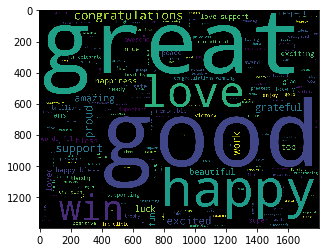

In [73]:
# positive words # Choose the path for +ve words stored in system
with open("C:/Users/manth/Assignment/Text Mining/positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")
  
# Choosing the only words which are present in positive words
tweet_pos = " ".join ([w for w in tweet_words if w in poswords])

# Positive word cloud
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(tweet_pos)

plt.imshow(wordcloud_pos)


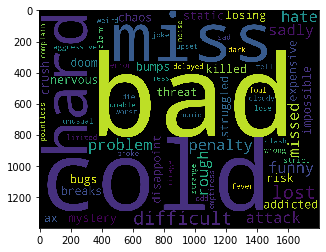

In [74]:
# negative words  Choose path for -ve words stored in system
with open("C:/Users/manth/Assignment/Text Mining/negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

# Choosing the only words which are present in negwords
movie_neg = " ".join ([w for w in twitter_words if w in negwords])

# negative word cloud
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(movie_neg)

plt.imshow(wordcloud_neg)